### import necessary libraries

In [1]:

import seaborn as sns
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix


### loading the dataset

In [2]:
df=pd.read_csv("dataset2.csv")

In [3]:
df.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034


### EDA

In [4]:
df.describe()

,Visit,MR Delay,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
count,598.000000,598.000000,598.000000,598.000000,569.000000,596.000000,598.000000,598.000000,598.000000,598.000000
mean,1.904682,604.167224,77.285953,14.508361,2.500879,27.285235,0.285953,1488.411371,0.728697,1.194614
std,0.943608,642.018910,7.855916,2.940350,1.161478,3.771523,0.369712,172.964839,0.037138,0.135085
min,1.000000,0.000000,60.000000,6.000000,1.000000,4.000000,0.000000,1106.000000,0.644000,0.876000
25%,1.000000,0.000000,71.000000,12.000000,2.000000,27.000000,0.000000,1362.000000,0.698250,1.104500
50%,2.000000,552.500000,77.000000,14.000000,2.000000,29.000000,0.000000,1468.000000,0.727000,1.195500
75%,2.000000,932.000000,83.000000,16.000000,3.000000,30.000000,0.500000,1589.250000,0.755750,1.289000
max,5.000000,2639.000000,98.000000,23.000000,5.000000,30.000000,2.000000,2004.000000,0.837000,1.587000


In [5]:
df.shape

(598, 15)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 598 entries, 0 to 597
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Subject ID  598 non-null    object 
 1   MRI ID      598 non-null    object 
 2   Group       598 non-null    object 
 3   Visit       598 non-null    int64  
 4   MR Delay    598 non-null    int64  
 5   M/F         598 non-null    object 
 6   Hand        598 non-null    object 
 7   Age         598 non-null    int64  
 8   EDUC        598 non-null    int64  
 9   SES         569 non-null    float64
 10  MMSE        596 non-null    float64
 11  CDR         598 non-null    float64
 12  eTIV        598 non-null    int64  
 13  nWBV        598 non-null    float64
 14  ASF         598 non-null    float64
dtypes: float64(5), int64(5), object(5)
memory usage: 70.2+ KB


### Treating missing values

In [7]:
df.isnull().sum()

Subject ID     0
MRI ID         0
Group          0
Visit          0
MR Delay       0
M/F            0
Hand           0
Age            0
EDUC           0
SES           29
MMSE           2
CDR            0
eTIV           0
nWBV           0
ASF            0
dtype: int64

##### there are missing values in MMSE AND SES COLUMNS so we need to treat these values

In [8]:
 median=df['MMSE'].median()

In [9]:
df['MMSE'].fillna(median, inplace=True)

In [10]:
median = df['SES'].median()
df['SES'].fillna(median, inplace=True)

In [11]:
df.isnull().sum()

Subject ID    0
MRI ID        0
Group         0
Visit         0
MR Delay      0
M/F           0
Hand          0
Age           0
EDUC          0
SES           0
MMSE          0
CDR           0
eTIV          0
nWBV          0
ASF           0
dtype: int64

#### there is no missing values

### visualization

### checking for outliers

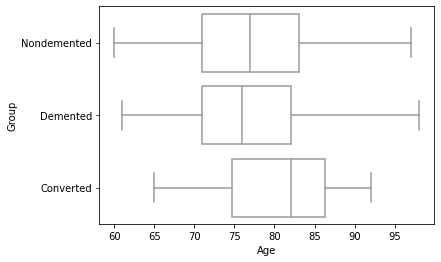

In [12]:
import matplotlib.pyplot as plt
plot = sns.boxplot(
    color='white',

    x=df["Age"], 
    y=df["Group"] 
);
plt.show()

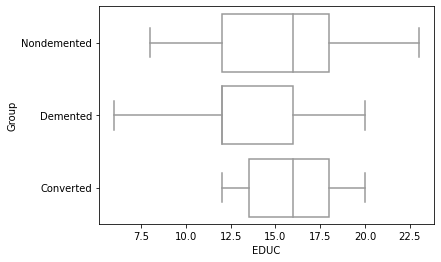

In [13]:
import matplotlib.pyplot as plt
plot = sns.boxplot(
    color='white',

    x=df["EDUC"], 
    y=df["Group"] 
);
plt.show()

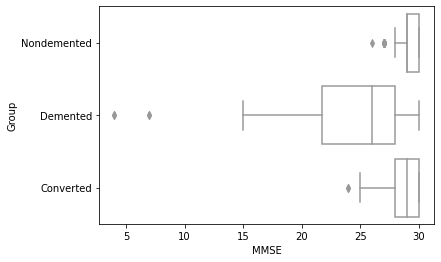

In [14]:
import matplotlib.pyplot as plt
plot = sns.boxplot(
    color='white',

    x=df["MMSE"], 
    y=df["Group"] 
);
plt.show()

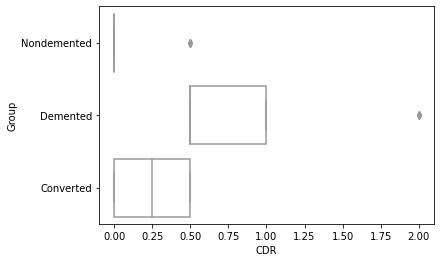

In [15]:
import matplotlib.pyplot as plt
plot = sns.boxplot(
    color='white',

    x=df["CDR"], 
    y=df["Group"] 
);
plt.show()

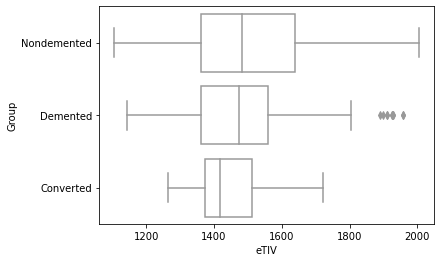

In [16]:
import matplotlib.pyplot as plt
plot = sns.boxplot(
    color='white',

    x=df["eTIV"], 
    y=df["Group"] 
);
plt.show()

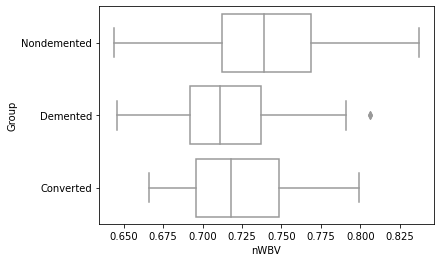

In [17]:
import matplotlib.pyplot as plt
plot = sns.boxplot(
    color='white',

    x=df["nWBV"], 
    y=df["Group"] 
);
plt.show()

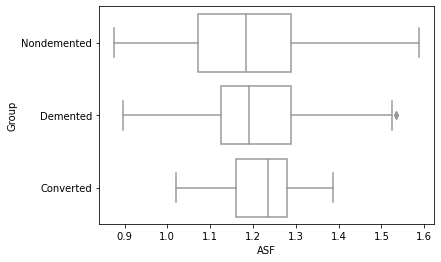

In [18]:
import matplotlib.pyplot as plt
plot = sns.boxplot(
    color='white',

    x=df["ASF"], 
    y=df["Group"] 
);
plt.show()

#### SO we can see there are no much outliers so we can proceed with data without treating it

In [19]:
df['Group'] = df['Group'].replace(['Converted'], ['Demented'])
df['Group'] = df['Group'].replace(['Converted'],['Demented'])


<AxesSubplot:xlabel='Group', ylabel='count'>

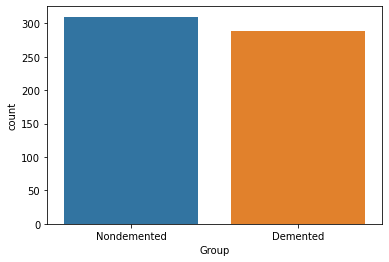

In [20]:
sns.countplot(x='Group', data=df)

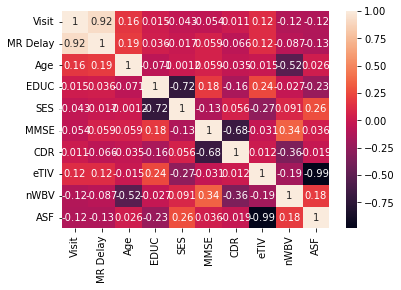

In [21]:
import pandas as pd

matrix = df.corr()
sns.heatmap(matrix,annot=True)
plt.show()

### Data preprocessing

In [22]:
print(df['Group'].head())

0    Nondemented
1    Nondemented
2       Demented
3       Demented
4       Demented
Name: Group, dtype: object


In [23]:

label_encoder = preprocessing.LabelEncoder() 

In [24]:
df['Group']= label_encoder.fit_transform(df['Group'])
print(df['Group'].head()) 
df['M/F']= label_encoder.fit_transform(df['M/F']) 
df['Hand'] = label_encoder.fit_transform(df['Hand'])


0    1
1    1
2    0
3    0
4    0
Name: Group, dtype: int32


In [25]:
df.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,1,1,0,1,0,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,1,2,457,1,0,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,0,1,0,1,0,75,12,2.0,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,0,2,560,1,0,76,12,2.0,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,0,3,1895,1,0,80,12,2.0,22.0,0.5,1698,0.701,1.034


### Data splitting

In [26]:
feature_col_names = ["M/F", "Age", "EDUC", "SES", "MMSE", "eTIV", "nWBV", "ASF"] ### independent variables
predicted_class_names = ['Group']### dependent variable


In [27]:
X = df[feature_col_names].values
y = df[predicted_class_names].values

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2)


### Model training

### SVM Classifier

In [29]:
from sklearn.preprocessing import StandardScaler

In [30]:
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [31]:
from sklearn.svm import SVC

In [32]:
svm = SVC(kernel= 'linear', random_state=1, C=0.1)
svm.fit(X_train_std, y_train)
 

C:\Users\Eswar\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=1, shrinking=True, tol=0.001,
    verbose=False)

In [33]:
from sklearn import metrics

In [34]:
y_pred=svm.predict(X_test_std)
print('Accuracy of the model:' , metrics.accuracy_score(y_test, y_pred)*100)


Accuracy of the model: 84.0


### RANDOM FOREST Classifier

In [35]:
from sklearn.ensemble import RandomForestClassifier

In [36]:
clf = RandomForestClassifier(n_estimators = 1000)  
  

clf.fit(X_train_std, y_train)
  
# performing predictions on the test dataset
y_pred1 = clf.predict(X_test_std)
  
# metrics are used to find accuracy or error
from sklearn import metrics  
print()
  
# using metrics module for accuracy calculation
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred1)*100)

C:\Users\Eswar\AppData\Local\Temp\ipykernel_12224\2766988063.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train_std, y_train)



ACCURACY OF THE MODEL:  90.66666666666666


### logistic regression

In [37]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train_std, y_train)

C:\Users\Eswar\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [38]:

y_pred2 = classifier.predict(X_test_std)

In [39]:
from sklearn.metrics import accuracy_score
print ("Accuracy : ", accuracy_score(y_test, y_pred2)*100)

Accuracy :  83.33333333333334


### DESCISION TREE Classifier

In [40]:

from sklearn.tree import DecisionTreeClassifier

In [41]:
clf_tree = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=1)
15
clf_tree.fit(X_train_std, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

In [42]:
y_pred3=clf_tree.predict(X_test_std)

In [43]:
print ("Accuracy : ", accuracy_score(y_test, y_pred3)*100)

Accuracy :  85.33333333333334


### XGBOOST CLASSIFIER

In [44]:
from xgboost import XGBClassifier
import xgboost as xgb

In [45]:

model1 = xgb.XGBClassifier(n_estimators=1000, max_depth=8, learning_rate=0.1, subsample=0.5)


train_model1= model1.fit(X_train_std, y_train)

In [46]:
from sklearn.metrics import classification_report

In [47]:
pred1 = train_model1.predict(X_test_std)


print ("Accuracy : ", accuracy_score(y_test, pred1)*100)



Accuracy :  91.33333333333333


In [48]:
pred1

array([0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1])

### naive bayes

In [49]:
from sklearn.naive_bayes import GaussianNB  
classifier = GaussianNB()  
classifier.fit(X_train_std, y_train)  

C:\Users\Eswar\anaconda3\lib\site-packages\sklearn\naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB(priors=None, var_smoothing=1e-09)

In [50]:
naive_pred = classifier.predict(X_test_std)

In [51]:
print ("Accuracy : ", accuracy_score(y_test, naive_pred)*100)

Accuracy :  79.33333333333333


#### After training the model with different machine learning algorithms we can see that xg boost and random forest gives best accuracy compared to other algorithms

### EVALUATING THE MODEL PERFORMANCE

<AxesSubplot:>

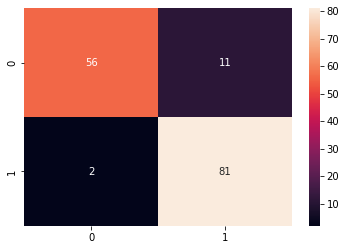

In [52]:
cm = confusion_matrix(y_test,pred1)
sns.heatmap(cm,annot=True)

In [53]:
print(classification_report(y_test,pred1))


              precision    recall  f1-score   support

           0       0.97      0.84      0.90        67
           1       0.88      0.98      0.93        83

    accuracy                           0.91       150
   macro avg       0.92      0.91      0.91       150
weighted avg       0.92      0.91      0.91       150



### converting the model into pickle file

In [54]:
import pickle

In [55]:
pickle.dump(model1, open('model.pkl','wb'))